In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [46]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [49]:
# Reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

/var/folders/cy/68jk8wdj3hn29zqvtz90hgfh0000gn/T/ipykernel_9222/1221787464.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [50]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [51]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Extract the most recent date from the result
most_recent_date = most_recent_date[0]

print("The most recent date in the data set is:", most_recent_date)

The most recent date in the data set is: 2017-08-23


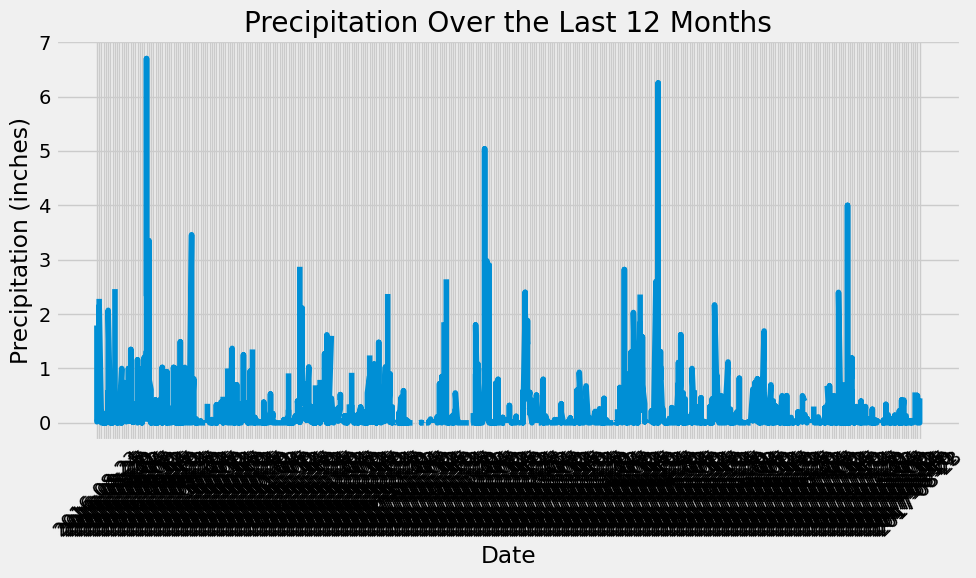

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year_ago_date = session.query(func.date(func.strftime("%Y-%m-%d", Measurement.date), "-1 year")).\
                    order_by(Measurement.date.desc()).first()[0]

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_date).all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')

plt.xticks( rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset
from sqlalchemy import create_engine
engine = create_engine("sqlite://Resources/hawaii.sqlite")
results = engine.execute("SELECT COUNT(*) FROM Station").fetchall()
print(results) 

ArgumentError: Invalid SQLite URL: sqlite://Resources/hawaii.sqlite
Valid SQLite URL forms are:
 sqlite:///:memory: (or, sqlite://)
 sqlite:///relative/path/to/file.db
 sqlite:////absolute/path/to/file.db

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
rom sqlalchemy import desc
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                                .group_by(Measurement.station)\
                                .order_by(desc(func.count(Measurement.station)))\
                                .all()
for station in most_active_stations:
     print (station)

SyntaxError: invalid syntax (2011862490.py, line 3)

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == most_active_stations[0][0]).all()

NameError: name 'most_active_stations' is not defined

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs)\
.filter(Measurement.station == most_active_stations[0][0])\
.filter(Measurement.date >= one_year_ago).all()
print(results)
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")

NameError: name 'most_active_stations' is not defined

# Close Session

In [61]:
# Close Session
session.close()